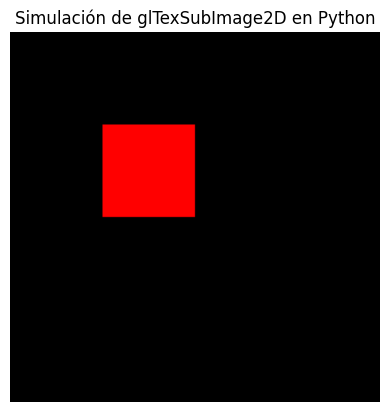

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Textura base 200x200 (negro) ---
texBase = np.zeros((200, 200, 3), dtype=np.uint8)

# --- Textura pequeña 50x50 (verde) ---
# Verde puro = [0, 255, 0]
texGreen = np.zeros((50, 50, 3), dtype=np.uint8)

texGreen[:, :, 0] = 255  # canal G (0=R, 1=G, 2=B)

# --- Función que simula glTexSubImage2D ---
def subloadTexture(baseTex, subTex, x, y):
    # baseTex : textura grande (H×W×C)
    # subTex  : textura a insertar (h×w×C)
    # x, y    : posición de inicio (fila, columna)

    h, w, _ = subTex.shape
    texOut = baseTex.copy()
    texOut[x:x+h, y:y+w, :] = subTex
    return texOut

# --- Aplicar subcarga ---
texBase2 = subloadTexture(texBase, texGreen, 50, 50)

# --- Mostrar resultado ---
plt.imshow(texBase2)
plt.title("Simulación de glTexSubImage2D en Python")
plt.axis("off")
plt.show()


In [ ]:
%%writefile main.c

#include <stdio.h>
#include <stdint.h>
#include <string.h>

#define BASE_W 200
#define BASE_H 200

#define SUB_W 50
#define SUB_H 50

void subloadTexture(uint8_t base[BASE_H][BASE_W][3],
                    uint8_t sub[SUB_H][SUB_W][3],
                    int x, int y)
{
    for (int i = 0; i < SUB_H; i++) {
        for (int j = 0; j < SUB_W; j++) {
            base[x + i][y + j][0] = sub[i][j][0];
            base[x + i][y + j][1] = sub[i][j][1];
            base[x + i][y + j][2] = sub[i][j][2];
        }
    }
}

int main() {
    static uint8_t texBase[BASE_H][BASE_W][3];
    memset(texBase, 0, sizeof(texBase));

    for (int i = 0; i < BASE_H; i++)
    for (int j = 0; j < BASE_W; j++) {
        texBase[i][j][0] = 0;    // R
        texBase[i][j][1] = 0;    // G
        texBase[i][j][2] = 255;  // B
    }



    static uint8_t texGreen[SUB_H][SUB_W][3];
    for (int i = 0; i < SUB_H; i++)
        for (int j = 0; j < SUB_W; j++) {
            texGreen[i][j][0] = 0;
            texGreen[i][j][1] = 255;
            texGreen[i][j][2] = 0;
        }

    // Subcarga
    subloadTexture(texBase, texGreen, 50, 50);

    // Guardar como PPM
    FILE *f = fopen("tex.ppm", "w");
    if (!f) { printf("Error creando archivo\n"); return 1; }

    fprintf(f, "P3\n%d %d\n255\n", BASE_W, BASE_H);
    for (int i = 0; i < BASE_H; i++) {
        for (int j = 0; j < BASE_W; j++) {
            fprintf(f, "%d %d %d ", texBase[i][j][0], texBase[i][j][1], texBase[i][j][2]);
        }
        fprintf(f, "\n");
    }

    fclose(f);
    printf("Imagen tex.ppm guardada.\n");
    return 0;
}


Overwriting main.c


In [ ]:
!gcc main.c -o tex


In [ ]:
!./tex



Imagen tex.ppm guardada.


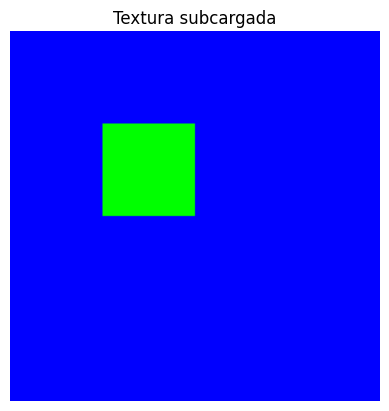

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("tex.ppm")
plt.imshow(img)
plt.axis("off")
plt.title("Textura subcargada")
plt.show()
